# 用梯度下降法实现线性回归


In [182]:
import numpy as np
class LinearRegression:

    def __init__(self):
        """初始化"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """训练模型"""
        assert X_train.shape[0] == y_train.shape[0],"Error!"
        
        def J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            res = np.empty(len(theta))
            res[0] = np.sum(X_b.dot(theta) - y)
            for i in range(1, len(theta)):
                res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
            return res * 2 / len(X_b)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        """预测"""
        assert self.intercept_ is not None and self.coef_ is not None,"Error!"
        assert X_predict.shape[1] == len(self.coef_), "Error!"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        """测试准确度"""
        y_predict = self.predict(X_test)
        return 1 - (np.sum((y_test - y_predict)**2) / len(y_test))/np.var(y_test)
    
    def __repr__(self):
        return "机器学习第一周课程LinearRegression"
    

In [183]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [184]:
boston = datasets.load_boston()

X = boston.data[:,5]#使用一个特征，注意更改此处使用boston房价数据集的13个特征或其他特征测试效果
y = boston.target

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [186]:
reg = LinearRegression()

In [187]:
reg.fit(X_train.reshape(-1,1), y_train)#使用多个特征时注意此处输入

机器学习第一周课程LinearRegression

In [188]:
reg.coef_

array([8.6714879])

In [189]:
reg.score(X_test.reshape(-1,1), y_test)#使用多个特征时注意此处输入

0.4989601079033097

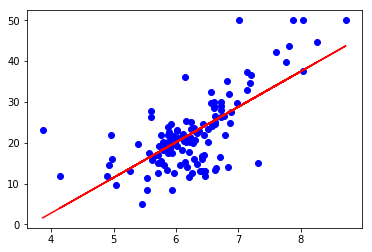

In [190]:
plt.scatter(X_test,y_test,color='blue')#使用多个特征不必画图
plt.plot(X_test,reg.predict(X_test.reshape(-1,1)),color='red')
plt.show()

In [191]:
boston = datasets.load_boston()

X = boston.data[:,4:6]#使用多个特征，注意更改此处使用boston房价数据集的13个特征或其他特征测试效果
y = boston.target

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [193]:
reg = LinearRegression()

In [194]:
reg.fit(X_train.reshape(-1,2), y_train)

机器学习第一周课程LinearRegression

In [195]:
reg.score(X_test.reshape(-1,2), y_test)

0.5988084504698736